In [ ]:
def solve_game(payoffs, as1, as2):
    n = len(as1)
    m = len(as2)


    payoff_matrix = np.zeros((n, m))
    for i in range(n):
        for j in range(m):
            idx = i*m + j
            ld = payoffs[idx]
            payoff_matrix[i, j] = ld['dpdf'][-1]




    if debug_mode:
        print("\n=== Debug: Final Payoff Matrix ===")
        print(f"Matrix dimensions: {n} x {m}\n")
        print("Payoff Matrix (probability of reaching target):")
        for i in range(n):
            row_str = f"Row {i+1:2d}:"
            for j in range(m):
                row_str += f" {payoff_matrix[i,j]:8.6f}"
            print(row_str)
        print("\n=== End Debug: Final Payoff Matrix ===\n")
    

    c = np.zeros(n+1)
    c[0] = 1.0
    
    A_ub = np.zeros((m, n+1))
    b_ub = np.zeros(m)
    for j in range(m):
        A_ub[j,0] = -1.0
        for i in range(n):
            A_ub[j,i+1] = payoff_matrix[i,j]
            
    A_eq = np.zeros((1, n+1))
    A_eq[0,1:] = 1.0
    b_eq = np.array([1.0])
    
    bounds = [(0,None)]*(n+1)
    
    def_succ = None
    v_attacker = None
    

    res = linprog(c, A_ub=A_ub, b_ub=b_ub, A_eq=A_eq, b_eq=b_eq, bounds=bounds)
    


    if res.success:

        def_succ = res.x[0]
        x_def = res.x[1:]
        

        c_att = np.zeros(m+1)
        c_att[0] = -1.0
        
        A_ub_att = np.zeros((n, m+1))
        b_ub_att = np.zeros(n)
        for i in range(n):
            A_ub_att[i,0] = 1.0
            for j in range(m):
                A_ub_att[i,j+1] = -payoff_matrix[i,j]
                
        A_eq_att = np.zeros((1, m+1))
        A_eq_att[0,1:] = 1.0
        b_eq_att = np.array([1.0])
        
        bounds_att = [(0,None)]*(m+1)


        res_att = linprog(c_att, A_ub=A_ub_att, b_ub=b_ub_att, 
                         A_eq=A_eq_att, b_eq=b_eq_att, bounds=bounds_att)
        

        
    if res_att.success == True:
        att_strat = res_att.x[1:]
        att_succ = res_att.x[0]
            

            if abs(def_succ - v_attacker) > 1e-5:
                logger.info("\nWarning: Defender and attacker values don't match!")
                logger.info(f"Defender value: {def_succ:.6f}")
                logger.info(f"Attacker value: {v_attacker:.6f}")
            
            return {
                'optimal_defense': dict(zip(as1, x_def)),
                'attacker_strategy': att_strat,
                'defender_success': def_succ,
                'attacker_success': att_succ
            }
    
    logger.info("LP optimization failed")
    return None

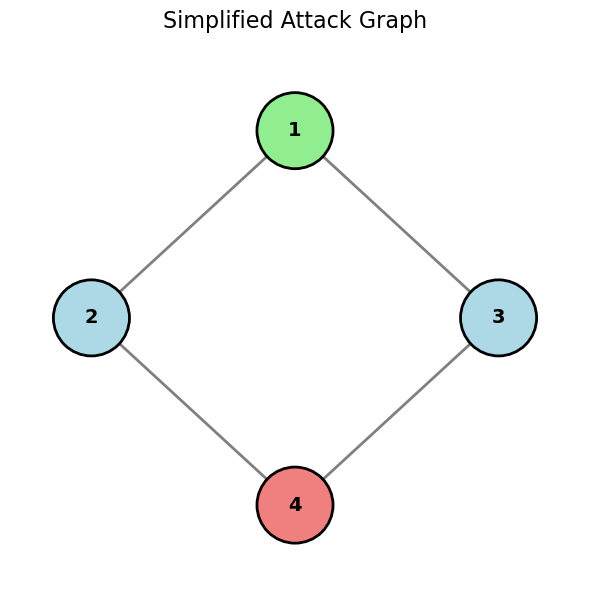

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

def create_attack_graph():
    G = nx.DiGraph()
    G.add_edges_from([(1, 2), (1, 3), (2, 4), (3, 4)])
    
    # Diamond shape positioning
    pos = {
        1: (0.5, 1.0),   # top (green)
        2: (0.0, 0.5),   # left (blue)
        3: (1.0, 0.5),   # right (blue)
        4: (0.5, 0.0)    # bottom (red)
    }
    
    fig, ax = plt.subplots(figsize=(6, 6))
    
    # Draw edges
    nx.draw_networkx_edges(G, pos, ax=ax, edge_color='gray', 
                          arrows=True, arrowsize=20, width=2)
    
    # Node colors and list
    node_colors = ['lightgreen', 'lightblue', 'lightblue', 'lightcoral']
    node_list = [1, 2, 3, 4]
    
    # Draw nodes - increased size to 3000
    nx.draw_networkx_nodes(G, pos, ax=ax, nodelist=node_list,
                          node_color=node_colors, node_size=3000, 
                          edgecolors='black', linewidths=2)
    
    # Draw labels
    node_labels = {1: '1', 2: '2', 3: '3', 4: '4'}
    nx.draw_networkx_labels(G, pos, ax=ax, labels=node_labels,
                          font_size=14, font_weight='bold', font_color='black')
    
    ax.set_xlim(-0.2, 1.2)
    ax.set_ylim(-0.2, 1.2)
    ax.axis('off')
    plt.title('Simplified Attack Graph', fontsize=16, pad=20)
    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    create_attack_graph()

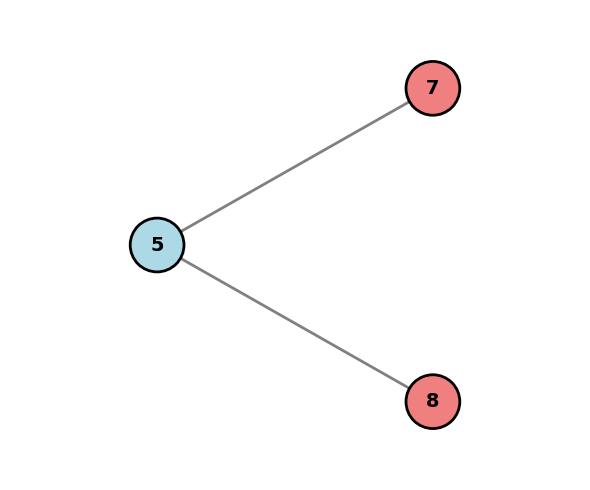

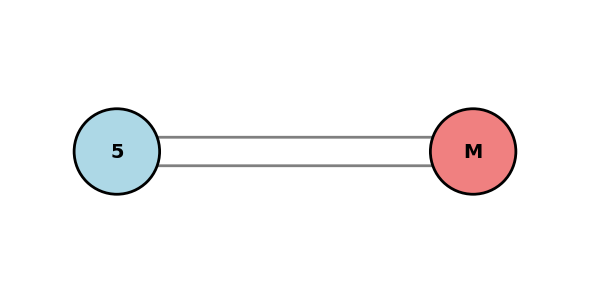

In [15]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Image 1: Node 5 connected to nodes 7 and 8
def create_image_1():
    G = nx.DiGraph()
    G.add_edges_from([(5, 7), (5, 8)])
    
    # Even closer positioning - very short edges
    pos = {
        5: (0, 0.5),
        7: (0.15, 0.58),
        8: (0.15, 0.42)
    }
    
    fig, ax = plt.subplots(figsize=(6, 5))
    
    # Draw edges
    nx.draw_networkx_edges(G, pos, ax=ax, edge_color='gray', 
                          arrows=True, arrowsize=20, width=2)
    
    # Node colors
    node_colors = ['lightblue', 'lightcoral', 'lightcoral']
    node_list = [5, 7, 8]
    
    # Draw nodes - larger size
    nx.draw_networkx_nodes(G, pos, ax=ax, nodelist=node_list,
                          node_color=node_colors, node_size=1500, 
                          edgecolors='black', linewidths=2)
    
    # Draw labels
    node_labels = {5: '5', 7: '7', 8: '8'}
    nx.draw_networkx_labels(G, pos, ax=ax, labels=node_labels,
                          font_size=14, font_weight='bold', font_color='black')
    
    # Tighter axis limits to remove excess white space
    ax.set_xlim(-0.08, 0.23)
    ax.set_ylim(0.38, 0.62)
    ax.axis('off')
    plt.tight_layout()
    plt.show()


# Image 2: Node 5 connected to node M with two parallel straight edges
def create_image_2():
    # Closer positioning
    pos = {
        5: (0, 0.5),
        'M': (0.5, 0.5)
    }
    
    fig, ax = plt.subplots(figsize=(6, 5))
    
    # Calculate offset for parallel edges
    x1, y1 = pos[5]
    x2, y2 = pos['M']
    
    # Perpendicular offset
    offset = 0.02
    dx = x2 - x1
    dy = y2 - y1
    length = np.sqrt(dx**2 + dy**2)
    
    # Perpendicular unit vector
    perp_x = -dy / length
    perp_y = dx / length
    
    # Draw two parallel arrows
    for sign in [1, -1]:
        ox = sign * offset * perp_x
        oy = sign * offset * perp_y
        
        ax.annotate('', xy=(x2 + ox, y2 + oy), xytext=(x1 + ox, y1 + oy),
                   arrowprops=dict(arrowstyle='->', color='gray', lw=2, 
                                 shrinkA=15, shrinkB=15))
    
    # Node colors
    node_colors = ['lightblue', 'lightcoral']
    node_list = [5, 'M']
    
    # Draw nodes manually
    for node, color in zip(node_list, node_colors):
        circle = plt.Circle(pos[node], 0.06, color=color, ec='black', lw=2, zorder=3)
        ax.add_patch(circle)
    
    # Draw labels
    for node in node_list:
        ax.text(pos[node][0], pos[node][1], str(node), 
               ha='center', va='center', fontsize=14, 
               fontweight='bold', color='black', zorder=4)
    
    ax.set_xlim(-0.15, 0.65)
    ax.set_ylim(0.3, 0.7)
    ax.set_aspect('equal')
    ax.axis('off')
    plt.tight_layout()
    plt.show()


# Generate both images
if __name__ == "__main__":
    create_image_1()
    create_image_2()

STATISTICAL ANALYSIS

FOURTH MOVEMENT (Random Intervals):
------------------------------------------------------------
Linear Regression: Success = -0.024692 × Activity + 0.049423
R² = 0.987323
Correlation coefficient (r) = -0.993641
P-value = 0.071830
Standard error = 0.002798

Interpretation: Each unit increase in defender activity
                decreases attacker success by 0.024692

SECOND MOVEMENT (Geometric Distribution, λ=4):
------------------------------------------------------------
Linear Regression: Success = -0.010333 × λ_D + 0.097333
R² = 1.000000
Correlation coefficient (r) = -1.000000
P-value = 0.000000
Standard error = 0.000000

Interpretation: Each unit increase in defense rate (λ_D)
                decreases attacker success by 0.010333

Generating plots...


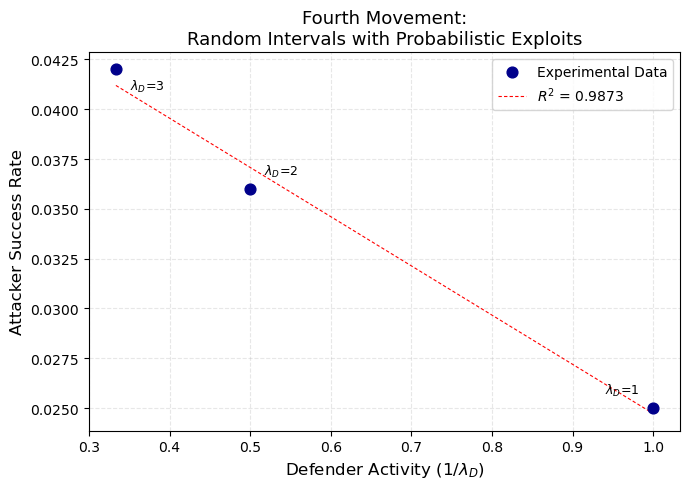

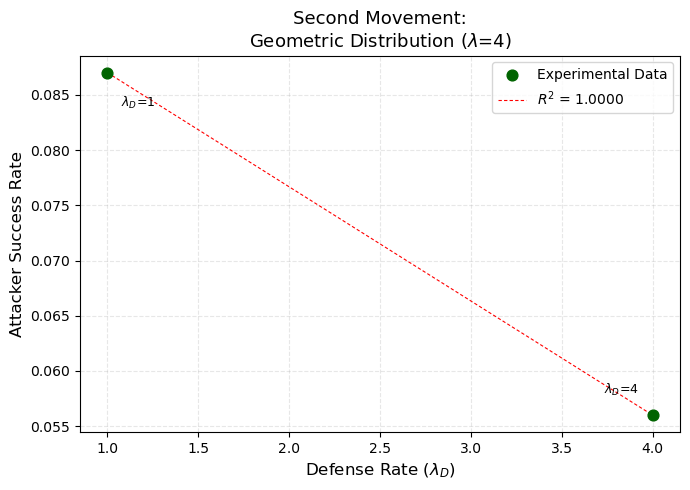

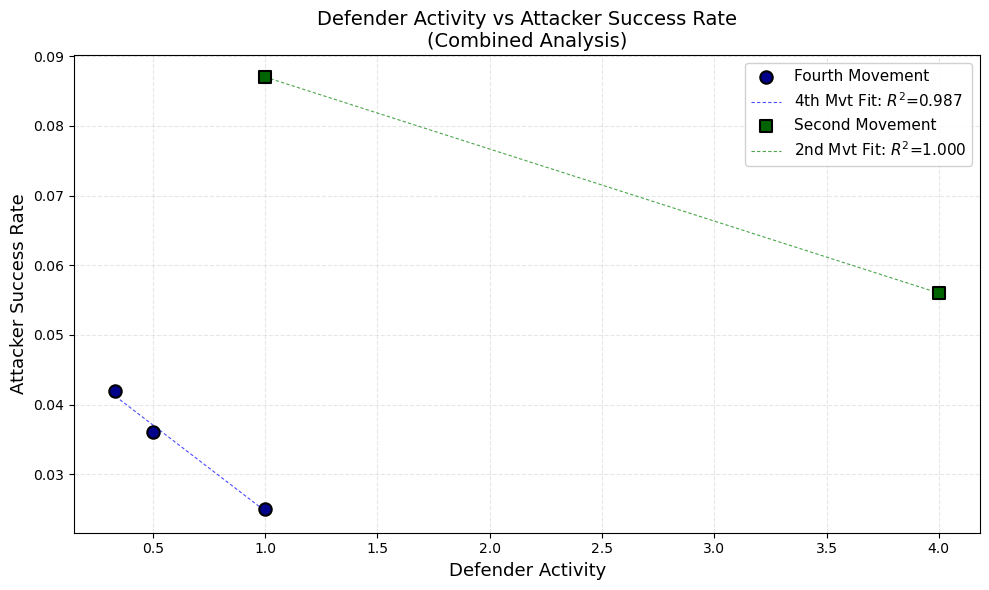


Done!


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

second_movement_data = {
    'lambda_1': {
        'lambda_D': [1],
        'success': [0.056]
    },
    'lambda_4': {
        'lambda_D': [1, 4],
        'success': [0.087, 0.056]
    }
}

# Fourth Movement (Random Intervals with Probabilistic Exploits)
# Critical: Higher λ_D = LESS ACTIVE defender (longer breaks between checks)
fourth_movement_data = {
    'lambda_D': [3, 2, 1],  # Less active → More active
    'success': [0.042, 0.036, 0.025]
}


def plot_fourth_movement():
    """
    Plot the Fourth Movement separately
    """
    fig, ax = plt.subplots(figsize=(7, 5))
    
    # Convert λ_D to defender activity (inverse relationship)
    lambda_D_values = np.array(fourth_movement_data['lambda_D'])
    defender_activity = 1.0 / lambda_D_values  # Higher activity = more checks
    success_rates = np.array(fourth_movement_data['success'])
    
    # Linear regression
    slope, intercept, r_value, p_value, std_err = stats.linregress(defender_activity, success_rates)
    
    # Create fit line
    activity_fit = np.linspace(min(defender_activity), max(defender_activity), 100)
    success_fit = slope * activity_fit + intercept
    
    # Plot
    ax.scatter(defender_activity, success_rates, s=60, color='darkblue', 
                label='Experimental Data', zorder=3)
    ax.plot(activity_fit, success_fit, 'r--', linewidth=0.8, dashes=(3, 2),
             label=f'$R^2$ = {r_value**2:.4f}')
    
    # Annotations with λ_D values - NO BACKGROUND
    for i, (act, succ, lam) in enumerate(zip(defender_activity, success_rates, lambda_D_values)):
        if i == 0:  # λ_D=3
            offset = (10, -15)
        elif i == 1:  # λ_D=2
            offset = (10, 10)
        else:  # λ_D=1 - move to the left
            offset = (-35, 10)
        
        ax.annotate(f'$\\lambda_D$={lam}', 
                    xy=(act, succ), 
                    xytext=offset,
                    textcoords='offset points',
                    fontsize=9)
    
    ax.set_xlabel('Defender Activity (1/$\\lambda_D$)', fontsize=12)
    ax.set_ylabel('Attacker Success Rate', fontsize=12)
    ax.set_title('Fourth Movement:\nRandom Intervals with Probabilistic Exploits', 
                  fontsize=13)
    ax.grid(True, alpha=0.3, linestyle='--')
    ax.legend(fontsize=10, loc='best')
    
    plt.tight_layout()
    return fig


def plot_second_movement():
    """
    Plot the Second Movement separately
    """
    fig, ax = plt.subplots(figsize=(7, 5))
    
    # For second movement, λ_D directly represents defense rate (higher = more active)
    lambda_D_second = np.array(second_movement_data['lambda_4']['lambda_D'])
    success_second = np.array(second_movement_data['lambda_4']['success'])
    
    # Linear regression
    slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(lambda_D_second, success_second)
    
    # Create fit line
    lambda_D_fit = np.linspace(min(lambda_D_second), max(lambda_D_second), 100)
    success_fit2 = slope2 * lambda_D_fit + intercept2
    
    # Plot
    ax.scatter(lambda_D_second, success_second, s=60, color='darkgreen', 
                label='Experimental Data', zorder=3)
    ax.plot(lambda_D_fit, success_fit2, 'r--', linewidth=0.8, dashes=(3, 2),
             label=f'$R^2$ = {r_value2**2:.4f}')
    
    # Annotations - NO BACKGROUND
    for i, (lam, succ) in enumerate(zip(lambda_D_second, success_second)):
        if i == 0:  # λ_D=1 - move down
            offset = (10, -25)
        else:  # λ_D=4 - move up and to the left
            offset = (-35, 15)
        
        ax.annotate(f'$\\lambda_D$={lam}', 
                    xy=(lam, succ), 
                    xytext=offset,
                    textcoords='offset points',
                    fontsize=9)
    
    ax.set_xlabel('Defense Rate ($\\lambda_D$)', fontsize=12)
    ax.set_ylabel('Attacker Success Rate', fontsize=12)
    ax.set_title('Second Movement:\nGeometric Distribution ($\\lambda$=4)', 
                  fontsize=13)
    ax.grid(True, alpha=0.3, linestyle='--')
    ax.legend(fontsize=10, loc='best')
    
    plt.tight_layout()
    return fig


def plot_combined_normalized():
    """
    Plot both movements on the same axes with normalized defender activity.
    Both converted to: higher activity = better defense
    """
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Fourth Movement: Activity = 1/λ_D
    lambda_D_fourth = np.array(fourth_movement_data['lambda_D'])
    activity_fourth = 1.0 / lambda_D_fourth
    success_fourth = np.array(fourth_movement_data['success'])
    
    # Second Movement: Activity = λ_D
    activity_second = np.array(second_movement_data['lambda_4']['lambda_D'])
    success_second = np.array(second_movement_data['lambda_4']['success'])
    
    # Plot Fourth Movement
    slope_f, intercept_f, r_f, _, _ = stats.linregress(activity_fourth, success_fourth)
    activity_fit_f = np.linspace(min(activity_fourth), max(activity_fourth), 100)
    success_fit_f = slope_f * activity_fit_f + intercept_f
    
    ax.scatter(activity_fourth, success_fourth, s=80, color='darkblue', 
              marker='o', label='Fourth Movement', zorder=3, edgecolors='black', linewidth=1.5)
    ax.plot(activity_fit_f, success_fit_f, 'b--', linewidth=0.8, dashes=(3, 2), alpha=0.7,
           label=f'4th Mvt Fit: $R^2$={r_f**2:.3f}')
    
    # Plot Second Movement
    slope_s, intercept_s, r_s, _, _ = stats.linregress(activity_second, success_second)
    activity_fit_s = np.linspace(min(activity_second), max(activity_second), 100)
    success_fit_s = slope_s * activity_fit_s + intercept_s
    
    ax.scatter(activity_second, success_second, s=80, color='darkgreen', 
              marker='s', label='Second Movement', zorder=3, edgecolors='black', linewidth=1.5)
    ax.plot(activity_fit_s, success_fit_s, 'g--', linewidth=0.8, dashes=(3, 2), alpha=0.7,
           label=f'2nd Mvt Fit: $R^2$={r_s**2:.3f}')
    
    ax.set_xlabel('Defender Activity', fontsize=13)
    ax.set_ylabel('Attacker Success Rate', fontsize=13)
    ax.set_title('Defender Activity vs Attacker Success Rate\n(Combined Analysis)', 
                fontsize=14)
    ax.grid(True, alpha=0.3, linestyle='--')
    ax.legend(fontsize=11, loc='best', framealpha=0.9)
    
    plt.tight_layout()
    return fig


def print_statistics():
    """Print detailed statistics about the relationships"""
    print("="*60)
    print("STATISTICAL ANALYSIS")
    print("="*60)
    
    # Fourth Movement
    print("\nFOURTH MOVEMENT (Random Intervals):")
    print("-" * 60)
    lambda_D_values = np.array(fourth_movement_data['lambda_D'])
    defender_activity = 1.0 / lambda_D_values
    success_rates = np.array(fourth_movement_data['success'])
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(defender_activity, success_rates)
    
    print(f"Linear Regression: Success = {slope:.6f} × Activity + {intercept:.6f}")
    print(f"R² = {r_value**2:.6f}")
    print(f"Correlation coefficient (r) = {r_value:.6f}")
    print(f"P-value = {p_value:.6f}")
    print(f"Standard error = {std_err:.6f}")
    print(f"\nInterpretation: Each unit increase in defender activity")
    print(f"                decreases attacker success by {abs(slope):.6f}")
    
    # Second Movement
    print("\n" + "="*60)
    print("SECOND MOVEMENT (Geometric Distribution, λ=4):")
    print("-" * 60)
    lambda_D_second = np.array(second_movement_data['lambda_4']['lambda_D'])
    success_second = np.array(second_movement_data['lambda_4']['success'])
    
    slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(lambda_D_second, success_second)
    
    print(f"Linear Regression: Success = {slope2:.6f} × λ_D + {intercept2:.6f}")
    print(f"R² = {r_value2**2:.6f}")
    print(f"Correlation coefficient (r) = {r_value2:.6f}")
    print(f"P-value = {p_value2:.6f}")
    print(f"Standard error = {std_err2:.6f}")
    print(f"\nInterpretation: Each unit increase in defense rate (λ_D)")
    print(f"                decreases attacker success by {abs(slope2):.6f}")
    print("="*60)


if __name__ == "__main__":
    # Print statistics
    print_statistics()
    
    # Create plots
    print("\nGenerating plots...")
    
    # Create separate plots for each movement
    fig1 = plot_fourth_movement()
    fig2 = plot_second_movement()
    
    # Combined normalized plot
    fig3 = plot_combined_normalized()
    
    plt.show()
    print("\nDone!")